In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, callbacks, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Load the dataset


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=42, test_size=0.2, stratify=y_train, shuffle=True)

In [4]:
print(f"x_train = {x_train.shape}   y_train = {y_train.shape}\nx_test = {x_test.shape}   y_test = {y_test.shape}\
\nx_val = {x_val.shape}   y_val = {y_val.shape}")

x_train = (48000, 28, 28)   y_train = (48000,)
x_test = (10000, 28, 28)   y_test = (10000,)
x_val = (12000, 28, 28)   y_val = (12000,)


In [5]:
def dislay_image(x, y, nrows=4, ncols=6):
    for i in range(nrows*ncols):
        idx = np.random.randint(0, x.shape[0])
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(x[idx])
        plt.title(f"classe : {y[idx]}")
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        
    plt.tight_layout()
    plt.show()

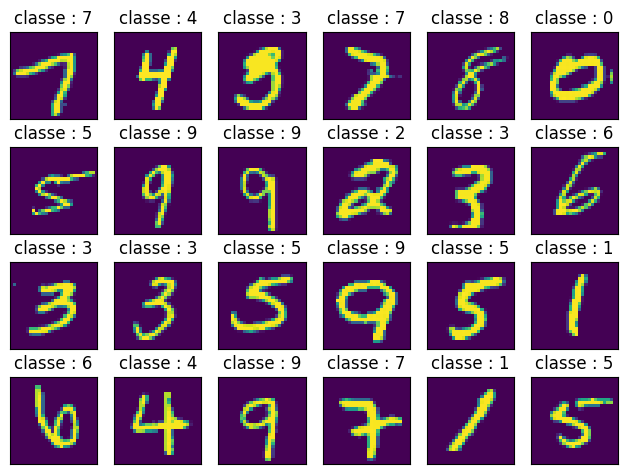

In [6]:
dislay_image(x_train, y_train)

In [7]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

((48000, 10), (10000, 10))

In [8]:
print(f"x_train = {x_train.shape}   y_train = {y_train.shape}\nx_test = {x_test.shape}   y_test = {y_test.shape}\
\nx_val = {x_val.shape}   y_val = {y_val.shape}")

x_train = (48000, 28, 28)   y_train = (48000, 10)
x_test = (10000, 28, 28)   y_test = (10000, 10)
x_val = (12000, 28, 28)   y_val = (12000, 10)


## Create the model


In [11]:
model = Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Rescaling(scale=1./255),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)        

In [14]:
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model.fit(x_train, y_train,
    epochs=10,
    validation_batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[model_checkpoint_callback])

Epoch 1/10
1500/1500 [==============================] - 48s 7ms/step - loss: 0.5446 - accuracy: 0.8417 - val_loss: 0.0893 - val_accuracy: 0.9759
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2267 - accuracy: 0.9393 - val_loss: 0.0627 - val_accuracy: 0.9816
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1786 - accuracy: 0.9529 - val_loss: 0.0665 - val_accuracy: 0.9815
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1536 - accuracy: 0.9593 - val_loss: 0.0668 - val_accuracy: 0.9811
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1316 - accuracy: 0.9657 - val_loss: 0.0573 - val_accuracy: 0.9847
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1259 - accuracy: 0.9670 - val_loss: 0.0531 - val_accuracy: 0.9860
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1155 - accuracy: 0.9700 - val_loss: 0.0510 - val_accur